In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from uncertainties import unumpy as unp
import uncertainties
import seaborn as sb
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [5]:
raw_data = pd.read_excel('data/raw_data.xlsx')
raw_data = raw_data[~raw_data.units.str.contains('trap')]

### 1) Remove non-mass measurements

In [67]:
dry = lambda x: 10**(-7.761+0.34975*x-3.9315e-3*x**2)
wet = lambda x: 10**(-6.972+0.3687*x-4.1725e-3*x**2)

size = np.linspace(2.4,60)
(dry(size)/wet(size))

array([0.14686157, 0.14006354, 0.1337852 , 0.12798441, 0.12262305,
       0.1176666 , 0.11308379, 0.10884626, 0.10492832, 0.10130665,
       0.09796011, 0.09486949, 0.09201739, 0.08938802, 0.08696706,
       0.08474152, 0.08269967, 0.08083089, 0.07912559, 0.07757514,
       0.07617181, 0.07490865, 0.0737795 , 0.07277891, 0.07190206,
       0.07114481, 0.07050358, 0.06997535, 0.06955768, 0.06924862,
       0.06904674, 0.06895112, 0.0689613 , 0.06907735, 0.06929978,
       0.06962964, 0.07006844, 0.07061822, 0.07128156, 0.07206155,
       0.07296189, 0.07398685, 0.07514137, 0.07643103, 0.07786213,
       0.07944178, 0.08117787, 0.08307922, 0.08515559, 0.08741783])

In [6]:
raw_data.reference.nunique()

61

In [8]:
mass_data = raw_data[raw_data.units.str.startswith('mg')]
mass_data['norm value'] = mass_data['numerical value']
mass_data.loc[mass_data.units=='mg/m^2 (wet weight)','norm value'] = mass_data.loc[mass_data.units=='mg/m^2 (wet weight)','norm value']*0.3

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [3]:
# mass_data = raw_data[raw_data.units=='mg/m^2 (dry weight)']

In [9]:
metadata = pd.read_csv('data/groups_per_reference.csv')
mass_data_with_meta = mass_data.merge(metadata,left_on='reference', right_on='Paper',how='left')

In [10]:
mass_data_with_meta.groupby('Standard groups')['site'].nunique()

Standard groups
Acari                  9
Arthropods           174
Collembola, Acari     48
Formicidae            49
Isoptera              23
Macroarthropods       25
Microarthropods        2
Orthoptera             1
Some arthropods        4
Name: site, dtype: int64

In [11]:
raw_data_with_meta = raw_data.merge(metadata,left_on='reference', right_on='Paper',how='left')
raw_data_val = raw_data_with_meta[(raw_data_with_meta['Standard groups']!='Microarthropods') | ((raw_data_with_meta['Standard groups']=='Microarthropods') & (raw_data_with_meta['sub-class'].isin(['Acari','Collembola'])))]
raw_data_val = raw_data_val[~raw_data_val['Standard groups'].isna()]
raw_data_val.groupby(['aggregated environment']).site.nunique()

aggregated environment
above ground     34
plants           51
soil/litter     312
Name: site, dtype: int64

In [12]:
valid_data = mass_data_with_meta.copy()
valid_data = valid_data[(valid_data['Standard groups']!='Microarthropods') | ((valid_data['Standard groups']=='Microarthropods') & (valid_data['sub-class'].isin(['Acari','Collembola'])))]

In [13]:
valid_data.loc[valid_data['sub-class']=='Acari','aggregated taxon'] = 'Acari'
valid_data.loc[valid_data['sub-class']=='Collembola','aggregated taxon'] = 'Collembola'
valid_data.loc[valid_data['super-family']=='Isoptera','aggregated taxon'] = 'Isoptera'
valid_data.loc[valid_data['family']=='Formicidae','aggregated taxon'] = 'Formicidae'
valid_data.loc[valid_data['aggregated taxon'].isna(),'aggregated taxon'] = 'Other'

In [14]:
soil_data = valid_data[valid_data['aggregated environment'] =='soil/litter']
canopy_data = valid_data[valid_data['aggregated environment'] =='plants']
surface_data = valid_data[valid_data['aggregated environment'] =='above ground']

In [15]:
soil_data.pivot_table(columns='aggregated taxon',values='site',index='aggregated biome', aggfunc='nunique')

aggregated taxon,Acari,Collembola,Formicidae,Isoptera,Other
aggregated biome,,,,,
Boreal Forests/Taiga,20.0,19.0,NaN,NaN,16.0
Crops,NaN,NaN,6.0,10.0,6.0
Deserts and Xeric Shrublands,1.0,1.0,4.0,5.0,NaN
"Mediterranean Forests, Woodlands and Scrub",NaN,NaN,NaN,2.0,NaN
Pasture,7.0,7.0,6.0,5.0,5.0
Shrubland/Grassland,NaN,NaN,14.0,NaN,NaN
Temperate Forests,42.0,41.0,21.0,1.0,29.0
"Temperate Grasslands, Savannas and Shrublands",15.0,17.0,9.0,4.0,15.0
Tropical and Subtropical Forests,5.0,6.0,20.0,20.0,15.0


In [16]:
# placeholder for ants
shrub_index = soil_data.loc[(soil_data['family'] == 'Formicidae') & (soil_data['aggregated biome'] == 'Shrubland/Grassland')].index
soil_data.loc[shrub_index[0:8],'aggregated biome'] = 'Temperate Grasslands, Savannas and Shrublands'
soil_data.loc[shrub_index[8:],'aggregated biome'] = 'Tropical and Subtropical Grasslands, Savannas and Shrublands'

In [391]:
soil_site_data = soil_data.groupby(['aggregated taxon','aggregated biome','site'])['norm value'].sum()
soil_biome_means = soil_site_data.groupby(['aggregated taxon','aggregated biome']).agg(['mean','count','sem'])
soil_biome_means.reset_index().pivot_table(columns='aggregated taxon',index='aggregated biome').to_csv('results/biome_means.csv')

soil_biome_means['umean'] = unp.uarray(nominal_values=soil_biome_means['mean'],std_devs=soil_biome_means['sem'])
soil_biome_means = soil_biome_means[['count','umean']]
soil_biome_means

count  \
aggregated taxon aggregated biome                                            
Acari            Boreal Forests/Taiga                                   20   
                 Pasture                                                 6   
                 Temperate Forests                                      42   
                 Temperate Grasslands, Savannas and Shrublands          15   
                 Tropical and Subtropical Forests                        5   
                 Tropical and Subtropical Grasslands, Savannas a...      2   
                 Tundra                                                 47   
Collembola       Boreal Forests/Taiga                                   19   
                 Pasture                                                 6   
                 Temperate Forests                                      41   
                 Temperate Grasslands, Savannas and Shrublands          17   
                 Tropical and Subtropical Forests                        6   
                 Tropical and Subtropical Grasslands, Savannas a...      2   
                 Tundra                                                 34   
Formicidae       Deserts and Xeric Shrublands                            4   
                 Pasture                                                 1   
                 Temperate Forests                                      21   
                 Temperate Grasslands, Savannas and Shrublands          17   
                 Tropical and Subtropical Forests                       15   
                 Tropical and Subtropical Grasslands, Savannas a...      8   
                 Tundra                                                  1   
Isoptera         Crops                                                   4   
                 Deserts and Xeric Shrublands                            5   
                 Mediterranean Forests, Woodlands and Scrub              2   
                 Temperate Forests                                       1   
                 Temperate Grasslands, Savannas and Shrublands           6   
                 Tropical and Subtropical Forests                       15   
                 Tropical and Subtropical Grasslands, Savannas a...      7   
                 Tundra                                                  1   
Other            Boreal Forests/Taiga                                   13   
                 Temperate Forests                                      29   
                 Temperate Grasslands, Savannas and Shrublands          12   
                 Tropical and Subtropical Forests                       10   
                 Tropical and Subtropical Grasslands, Savannas a...      3   
                 Tundra                                                 14   

                                                                                 umean  
aggregated taxon aggregated biome                                                       
Acari            Boreal Forests/Taiga                                  (5.1+/-1.0)e+02  
                 Pasture                                                     2.3+/-1.0  
                 Temperate Forests                                     (7.8+/-1.7)e+02  
                 Temperate Grasslands, Savannas and Shrublands         (3.2+/-0.8)e+02  
                 Tropical and Subtropical Forests                      (1.2+/-1.1)e+03  
                 Tropical and Subtropical Grasslands, Savannas a...        (7+/-5)e+01  
                 Tundra                                                (2.0+/-0.4)e+02  
Collembola       Boreal Forests/Taiga                                  (6.2+/-2.7)e+02  
                 Pasture                                                       0.0+/-0  
                 Temperate Forests                                     (6.5+/-3.2)e+03  
                 Temperate Grasslands, Savannas and Shrublands         (2.2+/-0.5)e+02  
                 Tropical

In [17]:
def calc_uval(x):
    return unp.uarray(nominal_values=np.mean(x),std_devs=x.sem())

soil_site_taxa_mean = soil_data.groupby(['aggregated taxon','aggregated biome','site','taxon'])['norm value'].mean().reset_index()
soil_site_data = soil_site_taxa_mean.groupby(['aggregated taxon','aggregated biome','site'])['norm value'].sum()
soil_biome_means = soil_site_data.reset_index().pivot_table(index='aggregated taxon',columns='aggregated biome',values='norm value', aggfunc=[calc_uval,'count'])

soil_biome_means = soil_biome_means.unstack().reset_index().pivot_table(index='aggregated taxon', columns=['aggregated biome','level_0'],values=0,aggfunc=sum)
soil_biome_means.columns = soil_biome_means.columns.set_levels(['mean','N'],1)
def print_u(x):
    if type(x) != uncertainties.core.Variable:
        return '{:.0f}'.format(x )
    else: 
        return '{:.0f}'.format(x.nominal_value)+'±'+'{:.0f}'.format(x.std_dev)

soil_biome_means_print = soil_biome_means.applymap(print_u)
soil_biome_means_print.to_csv('results/table_1.csv')

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [15]:
soil_biome_means_print

aggregated biome Boreal Forests/Taiga        Crops      \
level_0                          mean   N     mean   N   
aggregated taxon                                         
Acari                          349±65  20        0   0   
Collembola                    479±274  19        0   0   
Formicidae                          0   0    49±17   6   
Isoptera                            0   0  747±215  10   
Other                          264±62  16  549±197   6   

aggregated biome Deserts and Xeric Shrublands     \
level_0                                  mean  N   
aggregated taxon                                   
Acari                                   9±nan  1   
Collembola                              1±nan  1   
Formicidae                              72±37  4   
Isoptera                             1291±514  5   
Other                                       0  0   

aggregated biome Mediterranean Forests, Woodlands and Scrub     Pasture     \
level_0                                                mean  N     mean  N   
aggregated taxon                                                             
Acari                                                     0  0    43±41  7   
Collembola                                                0  0      4±4  7   
Formicidae                                                0  0   113±33  6   
Isoptera                                             1590±0  2  559±186  5   
Other                                                     0  0  707±265  5   

aggregated biome Temperate Forests      \
level_0                       mean   N   
aggregated taxon                         
Acari                      753±174  42   
Collembola                  311±98  41   
Formicidae                   81±26  21   
Isoptera                   900±nan   1   
Other                     1047±192  29   

aggregated biome Temperate Grasslands, Savannas and Shrublands      \
level_0                                                   mean   N   
aggregated taxon                                                     
Acari                                                   285±82  15   
Collembola                                              189±47  17   
Formicidae                                              198±99  17   
Isoptera                                               395±388   4   
Other                                                  578±237  15   

aggregated biome Tropical and Subtropical Forests      \
level_0                                      mean   N   
aggregated taxon                                        
Acari                                      162±83   5   
Collembola                                  49±28   6   
Formicidae                                 128±76  20   
Isoptera                                 1657±301  20   
Other                                     842±286  15   

aggregated biome Tropical and Subtropical Grasslands, Savannas and Shrublands  \
level_0                                                                  mean   
aggregated taxon                                                                
Acari                                                         74±47             
Collembola                                                     12±1             
Formicidae                                                   232±68             
Isoptera                                                   1861±769             
Other                                                       206±176             

aggregated biome       Tundra      
level_0            N     mean   N  
aggregated taxon                   
Acari              2   194±39  47  
Collembola         2  394±150  34  
Formicidae         9    0±nan   1  
Isoptera          10    0±nan   1  
Other              4    64±36  14

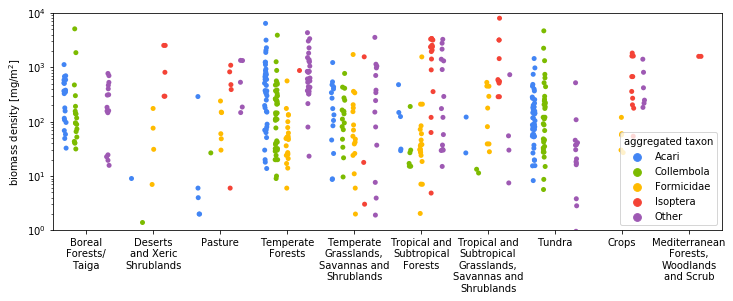

In [18]:
pal = sb.color_palette(['#4285F4','#7CBB00','#FFBB00','#f44336','#9e59b3'])
r = soil_site_data.reset_index()

original_biomes = r['aggregated biome'].unique()
# r.repl
print_biomes = ['Boreal\nForests/\nTaiga','Deserts\nand Xeric\nShrublands','Pasture','Temperate\nForests','Temperate\nGrasslands,\nSavannas and\nShrublands','Tropical and\nSubtropical\nForests','Tropical and\nSubtropical\nGrasslands,\nSavannas and\nShrublands','Tundra','Crops','Mediterranean\nForests,\nWoodlands\nand Scrub']
r2 = r.replace(to_replace=original_biomes,value=print_biomes)
fig,ax = plt.subplots(figsize=[12,4])
sb.stripplot(x='aggregated biome',y='norm value',hue='aggregated taxon',data=r2,dodge=True,palette=pal,ax=ax)
ax.set_yscale('log')
ax.set_ylim([1,10000])
ax.set_ylabel('biomass density [mg/m$^2$]')
ax.set_xlabel('')
plt.savefig('results/test_fig2.svg',dpi=300)


In [19]:
def legend_without_duplicate_labels(ax,pos):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique),bbox_to_anchor=pos)

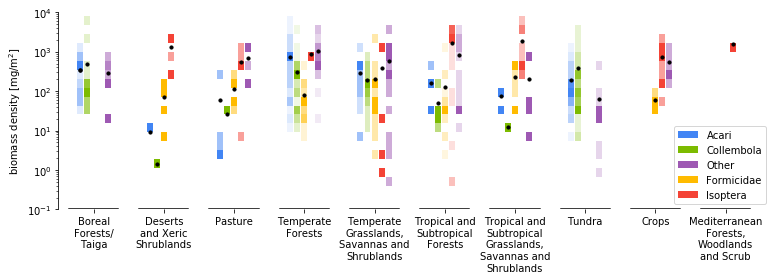

In [167]:
r = soil_site_data.reset_index()
original_biomes = r['aggregated biome'].unique()
# r.repl
print_biomes = ['Boreal\nForests/\nTaiga','Deserts\nand Xeric\nShrublands','Pasture','Temperate\nForests','Temperate\nGrasslands,\nSavannas and\nShrublands','Tropical and\nSubtropical\nForests','Tropical and\nSubtropical\nGrasslands,\nSavannas and\nShrublands','Tundra','Crops','Mediterranean\nForests,\nWoodlands\nand Scrub']
r2 = r.replace(to_replace=original_biomes,value=print_biomes)

r4 = r2.loc[r2['norm value']>0]
bins = np.logspace(np.log10(r4['norm value'].min()),np.log10(r4['norm value'].max()),20)
t = r4.groupby(['aggregated biome','aggregated taxon'])['norm value'].apply(lambda x: pd.cut(x,bins=bins).value_counts()/len(x)).reset_index()
y = t.groupby(['aggregated biome','aggregated taxon'])['norm value'].apply(np.max).reset_index()
t3 = t.merge(y,left_on=['aggregated biome','aggregated taxon'],right_on=['aggregated biome','aggregated taxon'])
t3['val'] = t3['norm value_x']/t3['norm value_y']


fig,ax=plt.subplots(figsize=[11,4])
def print_data(x):
    col_map = pd.Series(['#4285F4','#7CBB00','#FFBB00','#f44336','#9e59b3'],index=['Acari','Collembola','Formicidae','Isoptera','Other'])
    fine_loc = pd.Series([-0.4,-0.2,0,0.2,0.4],index=['Acari','Collembola','Formicidae','Isoptera','Other'])
    col = col_map.loc[x['aggregated taxon'].values[0]]
    locs = pd.Series(range(0,2*len(r4['aggregated biome'].unique()),2),index=r4['aggregated biome'].unique())
    xloc = locs.loc[x['aggregated biome'].values[0]] + fine_loc.loc[x['aggregated taxon'].values[0]]
    if x['val'].values[0] == 1:
        lab = x['aggregated taxon'].values[0]
    else:
        lab=None
    plt.bar(x=xloc,
            height=x['level_2'].values[0].right-x['level_2'].values[0].left,
            width=0.17,
            bottom=x['level_2'].values[0].left,
            log=True,color=col,alpha=x['val'].values[0],
            label=lab,
            zorder=1
           )
def print_mean_median(x):
    col_map = pd.Series(['#4285F4','#7CBB00','#FFBB00','#f44336','#9e59b3'],index=['Acari','Collembola','Formicidae','Isoptera','Other'])
    fine_loc = pd.Series([-0.4,-0.2,0,0.2,0.4],index=['Acari','Collembola','Formicidae','Isoptera','Other'])
    col = col_map.loc[x['aggregated taxon'].values[0]]
    locs = pd.Series(range(0,2*len(r4['aggregated biome'].unique()),2),index=r4['aggregated biome'].unique())
    xloc = locs.loc[x['aggregated biome'].values[0]] + fine_loc.loc[x['aggregated taxon'].values[0]]
    plt.scatter(x=xloc,y=x['norm value'].mean(),marker='.',c='k',s=40,zorder=3)
    
#     if x['val'].values[0] >0:
#         plt.plot([xloc-0.17/2,xloc+0.17/2],[x['level_2'].values[0].right,x['level_2'].values[0].right],color='k',linewidth=0.7,alpha=1)
for i in range(0,2*len(r4['aggregated biome'].unique()),2):    
    plt.plot([i-0.7,i+0.7],[1e-1,1e-1],'k')

ax = t3.groupby(['aggregated biome','aggregated taxon','level_2']).apply(print_data)
ax = plt.gca()
ax.set_xticks(range(0,2*len(r4['aggregated biome'].unique()),2))
ax.set_xticklabels(r4['aggregated biome'].unique())

ax.get_label()
ax.set_ylabel('biomass density [mg/m$^2$]')
# plt.legend()
ax.set_ylim([1e-1,1e4])
ax.set_xlim([-1,19])
legend_without_duplicate_labels(ax,(0.87,0.45))
sb.despine(top=True, bottom=True, right=True)
r4.groupby(['aggregated biome','aggregated taxon']).apply(print_mean_median)
plt.tight_layout()



# axins = inset_axes(ax,
#                    width="1.3%",  # width = 5% of parent_bbox width
#                    height="35%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(1.02, 0.05, 1, 1),
#                    bbox_transform=ax.transAxes,
#                    borderpad=0,
#                    )

# cmap = plt.get_cmap('Greys', 10)
# cbar = cm.ScalarMappable(cmap=cmap)
# cbar.set_array(np.array([0,1]))
# cb = fig.colorbar(cbar, cax=axins,shrink=0.4,ticks=[0,1],aspect=10)
# cb.ax.set_yticklabels(['least frequent','most frequent'])
# cb.outline.set_visible(False)


plt.savefig('results/fig_test_1.svg',dpi=300)
plt.savefig('results/fig_test_1.png',dpi=300)






[Text(1, 0, 'min'), Text(1, 0, 'max')]

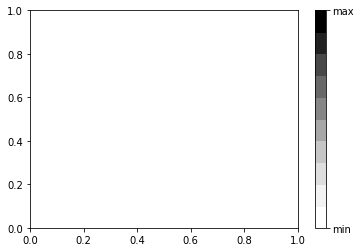

In [55]:
# cm.ScalarMappable()
cmap = plt.get_cmap('Greys', 10)
cbar = cm.ScalarMappable(cmap=cmap)
cbar.set_array(np.array([0,1]))
cb = plt.colorbar(cbar,ticks=[0,1],anchor=(0,0.5))
cb.ax.set_yticklabels(['min','max'])


In [2]:
plt.get_cmap()

In [187]:
r4 = r2.loc[r2['norm value']>0]
t = r4.groupby(['aggregated biome','aggregated taxon'])['norm value'].apply(lambda x: pd.cut(x,bins=bins).value_counts()/len(x)).reset_index()
u = t.loc[0,'level_2']
t2 = t.groupby(['aggregated biome','aggregated taxon','level_2']).apply(lambda x: print(x['norm value'].values[0])).reset_index()
t2

y = t.groupby(['aggregated biome','aggregated taxon'])['norm value'].apply(np.max).reset_index()
t3 = t.merge(y,left_on=['aggregated biome','aggregated taxon'],right_on=['aggregated biome','aggregated taxon'])
t3['val'] = t3['norm value_x']/t3['norm value_y']
t3

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.05
0.15
0.15
0.1
0.05
0.3
0.15
0.05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.15789473684210525
0.15789473684210525
0.2631578947368421
0.21052631578947367
0.05263157894736842
0.05263157894736842
0.0
0.0
0.05263157894736842
0.0
0.05263157894736842
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.26666666666666666
0.0
0.0
0.0
0.26666666666666666
0.13333333333333333
0.2
0.13333333333333333
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.4
0.4
0.2
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1
0.0
0.2
0.1
0.1
0.2
0.2
0.1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.16666666666666666
0.3333333333333333
0.16666666666666666
0.16666666666666666
0.16666666666666666
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.25
0.0
0.0
0.25
0.0
0.25
0.25
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


,index


,aggregated biome,aggregated taxon,level_2,norm value_x,norm value_y,val
0,Boreal\nForests/\nTaiga,Acari,"(348.417, 587.495]",0.300000,0.300000,1.000000
1,Boreal\nForests/\nTaiga,Acari,"(43.1, 72.675]",0.150000,0.300000,0.500000
2,Boreal\nForests/\nTaiga,Acari,"(587.495, 990.625]",0.150000,0.300000,0.500000
3,Boreal\nForests/\nTaiga,Acari,"(72.675, 122.543]",0.150000,0.300000,0.500000
4,Boreal\nForests/\nTaiga,Acari,"(122.543, 206.63]",0.100000,0.300000,0.333333
5,Boreal\nForests/\nTaiga,Acari,"(990.625, 1670.377]",0.050000,0.300000,0.166667
6,Boreal\nForests/\nTaiga,Acari,"(206.63, 348.417]",0.050000,0.300000,0.166667
7,Boreal\nForests/\nTaiga,Acari,"(25.561, 43.1]",0.050000,0.300000,0.166667
8,Boreal\nForests/\nTaiga,Acari,"(5.332, 8.99]",0.000000,0.300000,0.000000
9,Boreal\nForests/\nTaiga,Acari,"(0.66, 1.112]",0.000000,0.300000,0.000000


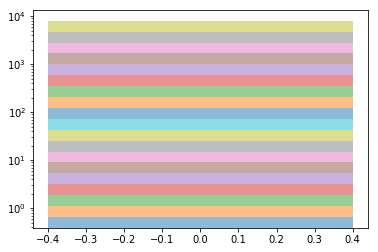

In [88]:
r3 = r2.loc[r2['norm value']>0,'norm value']
bins = np.logspace(np.log10(r3.min()),np.log10(r3.max()),20)
#plt.bar(x=0,bins
for i in range(1,len(bins)):
    plt.bar(x=0,height=bins[i]-bins[i-1],bottom=bins[i-1],log=True,alpha=0.5)
#r3.plot.hist(bins=np.logspace(np.log10(r3.min()),np.log10(r3.max()),20),logx=True)


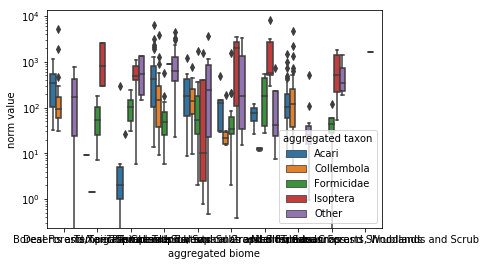

In [46]:
#soil_stacked = soil_biome_means.stack().stack().reset_index()
#sb.violinplot(x='aggregated biome',y=0,hue='aggregated taxon',data=soil_stacked[soil_stacked['level_0']=='mean'])


IndexError: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 100

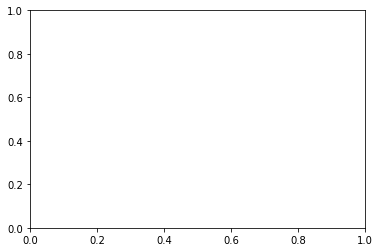

In [21]:
sb.stripplot(x='index',y,soil_biome_means)

In [15]:
soil_biome_means.sum().apply(print_u)

aggregated biome                                              level_0
Boreal Forests/Taiga                                          mean       1093+/-288
                                                              N                  55
Crops                                                         mean       1345+/-292
                                                              N                  22
Deserts and Xeric Shrublands                                  mean       1374+/-nan
                                                              N                  11
Mediterranean Forests, Woodlands and Scrub                    mean         1590+/-0
                                                              N                   2
Pasture                                                       mean       1426+/-329
                                                              N                  30
Temperate Forests                                             mean       3091+/-nan
      

In [20]:
soil_biome_means

aggregated biome Boreal Forests/Taiga                Crops      \
level_0                          mean   N             mean   N   
aggregated taxon                                                 
Acari                 (3.5+/-0.6)e+02  20                0   0   
Collembola            (4.8+/-2.7)e+02  19                0   0   
Formicidae                          0   0          49+/-17   6   
Isoptera                            0   0  (7.5+/-2.2)e+02  10   
Other                 (2.6+/-0.6)e+02  16  (5.5+/-2.0)e+02   6   

aggregated biome Deserts and Xeric Shrublands     \
level_0                                  mean  N   
aggregated taxon                                   
Acari                             9.145+/-nan  1   
Collembola                       1.4325+/-nan  1   
Formicidae                        (7+/-4)e+01  4   
Isoptera                      (1.3+/-0.5)e+03  5   
Other                                       0  0   

aggregated biome Mediterranean Forests, Woodlands and Scrub     \
level_0                                                mean  N   
aggregated taxon                                                 
Acari                                                     0  0   
Collembola                                                0  0   
Formicidae                                                0  0   
Isoptera                                         1590.0+/-0  2   
Other                                                     0  0   

aggregated biome          Pasture     Temperate Forests      \
level_0                      mean  N               mean   N   
aggregated taxon                                              
Acari                 (4+/-4)e+01  7    (7.5+/-1.7)e+02  42   
Collembola                  4+/-4  7    (3.1+/-1.0)e+02  41   
Formicidae               113+/-33  6            81+/-26  21   
Isoptera          (5.6+/-1.9)e+02  5        900.0+/-nan   1   
Other             (7.1+/-2.7)e+02  5  (1.05+/-0.19)e+03  29   

aggregated biome Temperate Grasslands, Savannas and Shrublands      \
level_0                                                   mean   N   
aggregated taxon                                                     
Acari                                          (2.9+/-0.8)e+02  15   
Collembola                                     (1.9+/-0.5)e+02  17   
Formicidae                                     (2.0+/-1.0)e+02  17   
Isoptera                                           (4+/-4)e+02   4   
Other                                          (5.8+/-2.4)e+02  15   

aggregated biome Tropical and Subtropical Forests      \
level_0                                      mean   N   
aggregated taxon                                        
Acari                             (1.6+/-0.8)e+02   5   
Collembola                                49+/-28   6   
Formicidae                        (1.3+/-0.8)e+02  20   
Isoptera                        (1.66+/-0.30)e+03  20   
Other                             (8.4+/-2.9)e+02  15   

aggregated biome Tropical and Subtropical Grasslands, Savannas and Shrublands  \
level_0                                                                  mean   
aggregated taxon                                                                
Acari                                                   (7+/-5)e+01             
Collembola                                               12.4+/-1.0             
Formicidae                                          (2.3+/-0.7)e+02             
Isoptera                                            (1.9+/-0.8)e+03             
Other                                               (2.1+/-1.8)e+02             

aggregated biome               Tundra      
level_0            N             mean   N  
aggregated taxon                           
Acari              2  (1.9+/-0.4)e+02  47  
Collembola         2  (3.9+/-1.5)e+02  34  
Formicidae         9        0.0+/-nan   1  
Isoptera          10        0.0+/-nan   1  
Other              4      (6+/-4)e+01  14

In [16]:
soil_site_data.loc[('Isoptera','Crops')]

site
Sampadi Forest Reserve                                                  204.0
Yurimaguas, Loreto, high input cultivation (corn, first crop)           360.0
Yurimaguas, Loreto, low input cultivation (rice, first crop)           1830.0
Yurimaguas, Loreto, traditional cultivation (first crop of cassava)     270.0
cariniagua research station-crops-cassava                               177.0
cariniagua research station-crops-rice                                   54.0
farmland / settlement (new world)                                      1614.0
farmland / settlement (old world)                                      1614.0
patchy woods + crops / grassland (new world)                            675.0
patchy woods + crops / grassland (old world)                            675.0
Name: norm value, dtype: float64

In [19]:
#t= soil_site_data.reset_index().pivot_table(index='aggregated taxon',columns='aggregated biome',values='norm value', aggfunc='median').T.reset_index()
t= soil_site_data.groupby(['aggregated taxon','aggregated biome']).median().reset_index().merge(pd.DataFrame(biome_area1),left_on='aggregated biome',right_index=True)
t.loc[:,'Total'] = (t.loc[:,'norm value']*t.loc[:,'area']).values
(t.pivot_table(values='Total',index='aggregated taxon',columns='aggregated biome',aggfunc=np.nansum)/1e18).sum(axis=1)


aggregated taxon
Acari         0.014765
Collembola    0.005222
Formicidae    0.007834
Isoptera      0.088276
Other         0.034344
dtype: float64

In [74]:
soil_biome_means_unp = soil_site_data.groupby(['aggregated taxon','aggregated biome']).apply(lambda x: unp.uarray(nominal_values= x.mean(),std_devs=x.sem()))
soil_biome_means_unp = soil_biome_means_unp.reset_index()
biome_area = pd.read_csv('data/aggregated biomes data.csv')
biome_area1 = biome_area.groupby('aggregated biome 1')['area'].sum()
biome_area2 = biome_area.groupby('aggregated biome 2')['area'].sum()
# .pivot_table(columns='aggregated taxon',index='aggregated biome')
soil_biome_means_unp1 = soil_biome_means_unp.merge(pd.DataFrame(biome_area1),left_on='aggregated biome',right_index=True)
soil_biome_means_unp2 = soil_biome_means_unp[soil_biome_means_unp['aggregated taxon'].isin(['Formicidae','Isoptera'])]
soil_biome_means_unp2.loc[soil_biome_means_unp2.loc[:,'aggregated biome'].str.contains('Forest'),'aggregated biome'] = 'Forests'
soil_biome_means_unp2.loc[soil_biome_means_unp2.loc[:,'aggregated biome'].str.contains('Grass'),'aggregated biome'] = 'Shrubland/Grassland'
soil_biome_means_unp2 = soil_biome_means_unp2.merge(pd.DataFrame(biome_area2),left_on='aggregated biome',right_index=True)
part1 = soil_biome_means_unp1[soil_biome_means_unp1['aggregated taxon'].isin(['Acari','Collembola','Formicidae','Isoptera','Other'])]
part2 = soil_biome_means_unp2[soil_biome_means_unp2['aggregated taxon'].isin(['Formicidae','Isoptera'])]

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [75]:
part1

,aggregated taxon,aggregated biome,norm value,area
0,Acari,Boreal Forests/Taiga,(3.5+/-0.6)e+02,1.570000e+13
8,Collembola,Boreal Forests/Taiga,(4.8+/-2.7)e+02,1.570000e+13
33,Other,Boreal Forests/Taiga,(2.6+/-0.6)e+02,1.570000e+13
1,Acari,Deserts and Xeric Shrublands,9.145+/-nan,1.960000e+13
9,Collembola,Deserts and Xeric Shrublands,1.4325+/-nan,1.960000e+13
17,Formicidae,Deserts and Xeric Shrublands,(7+/-4)e+01,1.960000e+13
25,Isoptera,Deserts and Xeric Shrublands,(1.3+/-0.5)e+03,1.960000e+13
2,Acari,Pasture,(4+/-4)e+01,2.760000e+13
10,Collembola,Pasture,4+/-4,2.760000e+13
18,Formicidae,Pasture,113+/-33,2.760000e+13


In [76]:
part1.loc[:,'Total'] = (part1.loc[:,'norm value']*part1.loc[:,'area']).values
part1.pivot_table(values='Total',index='aggregated taxon',columns='aggregated biome',aggfunc=np.nansum)/1e18

aggregated biome,Boreal Forests/Taiga,Crops,Deserts and Xeric Shrublands,Pasture,Temperate Forests,"Temperate Grasslands, Savannas and Shrublands",Tropical and Subtropical Forests,"Tropical and Subtropical Grasslands, Savannas and Shrublands",Tundra
aggregated taxon,,,,,,,,,
Acari,0.0055+/-0.0010,NaN,0.000179242+/-nan,0.0012+/-0.0011,0.0081+/-0.0019,0.0015+/-0.0004,0.0029+/-0.0015,0.0008+/-0.0005,0.00146+/-0.00029
Collembola,0.008+/-0.004,NaN,(2.8077+/-nan)e-05,0.00011+/-0.00011,0.0033+/-0.0011,0.00103+/-0.00026,0.0009+/-0.0005,0.000128+/-0.000010,0.0029+/-0.0011
Formicidae,NaN,0.00075+/-0.00026,0.0014+/-0.0007,0.0031+/-0.0009,0.00087+/-0.00028,0.0011+/-0.0005,0.0023+/-0.0013,0.0024+/-0.0007,0.0+/-nan
Isoptera,NaN,0.0114+/-0.0033,0.025+/-0.010,0.015+/-0.005,0.009684+/-nan,0.0021+/-0.0021,0.029+/-0.005,0.019+/-0.008,0.0+/-nan
Other,0.0041+/-0.0010,0.0084+/-0.0030,NaN,0.020+/-0.007,0.0113+/-0.0021,0.0031+/-0.0013,0.015+/-0.005,0.0021+/-0.0018,0.00048+/-0.00027


In [276]:
u = part1.pivot_table(values='Total',index='aggregated taxon',columns='aggregated biome',aggfunc=np.nansum)/1e18
print(u['Boreal Forests/Taiga'].sum()*1e3)
u.sum()*1e3

17+/-5


aggregated biome
Boreal Forests/Taiga                                                              17+/-5
Crops                                                                             21+/-4
Deserts and Xeric Shrublands                                    26.930939000000002+/-nan
Pasture                                                                           39+/-9
Temperate Forests                                               33.261603438670754+/-nan
Temperate Grasslands, Savannas and Shrublands                                  8.9+/-2.6
Tropical and Subtropical Forests                                                  50+/-8
Tropical and Subtropical Grasslands, Savannas and Shrublands                      25+/-8
Tundra                                                            4.88679019722328+/-nan
dtype: object

In [286]:
np.sqrt(part1.loc[non_na,'Total'].apply(lambda x: x.std_dev**2).sum())/1e15

19.172639486772447

In [277]:
non_na = ~(part1['Total'].apply(lambda x: x.std_dev).isna())
(part1.loc[non_na,'Total'].sum()+part1.loc[~non_na,'Total'].apply(lambda x: x.nominal_value).sum())/1e18

225.98581397971506+/-19.172639486772447

aggregated taxon
Acari         0.021603
Collembola    0.015982
Formicidae    0.011881
Isoptera      0.112580
Other         0.063941
Name: Total, dtype: float64

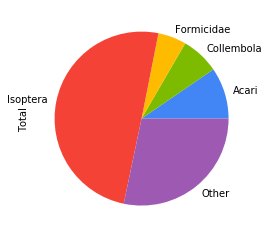

In [79]:
ax = ((part1.groupby('aggregated taxon').Total.sum()/1e18).apply(lambda x: x.nominal_value)/total_soil.nominal_value).plot.pie(colors=['#4285F4','#7CBB00','#FFBB00','#f44336','#9e59b3'])
plt.savefig('results/fig2a.svg', dpi=300)
(part1.groupby('aggregated taxon').Total.sum()/1e18).apply(lambda x: x.nominal_value)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


sub-phylum
Chelicerata      0.127+/-0.015
Crustacea      0.0063+/-0.0019
Hexapoda           0.77+/-0.09
Myriapoda        0.092+/-0.017
dtype: object

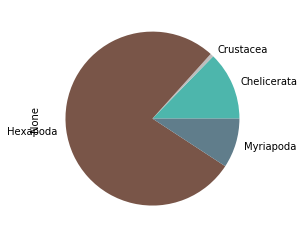

In [80]:
sp_soil_site_taxa_mean = soil_data.groupby(['aggregated taxon','sub-phylum','aggregated biome','site','taxon'])['norm value'].mean().reset_index()
sp_soil_site_data = sp_soil_site_taxa_mean.groupby(['aggregated taxon','sub-phylum','aggregated biome','site'])['norm value'].sum()
sp_soil_biome_means = sp_soil_site_data.reset_index().pivot_table(index=['sub-phylum','aggregated taxon'],columns='aggregated biome',values='norm value', aggfunc=calc_uval)
sp_soil_biome_means = sp_soil_biome_means.drop('Mixed')
area = biome_area.set_index('aggregated biome 1').loc[sp_soil_biome_means.columns,'area']
tot_sp = (sp_soil_biome_means*area).groupby('sub-phylum').apply(np.nansum).sum()

ax = ((sp_soil_biome_means*area).groupby('sub-phylum').apply(np.nansum)/tot_sp.nominal_value).apply(lambda x: x.nominal_value).plot.pie(colors=['#4db6ac','#bdbdbd','#795548','#607d8b'])
plt.savefig('results/fig2b.svg', dpi=300)
((sp_soil_biome_means*area).groupby('sub-phylum').apply(np.nansum)/tot_sp.nominal_value)

matplotlib.axes._subplots.AxesSubplot

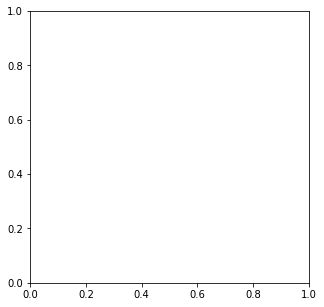

In [104]:
fig,ax = plt.subplots(figsize=[5,5])
type(ax)

In [141]:
group_sum.sort_values(ascending=False)

isoptera\n(termites)         0.112580
other                        0.063941
acari\n(mites)               0.021603
collembola\n(springtails)    0.015982
formicidae\n(ants)           0.011881
Name: Total, dtype: float64

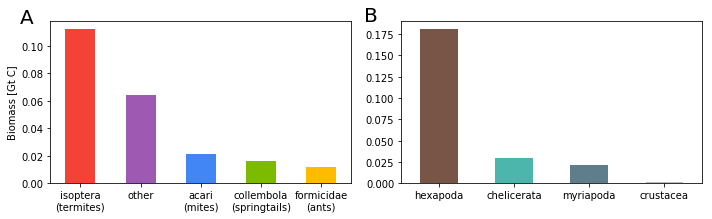

In [165]:
fig,ax = plt.subplots(1,2,figsize=[10,3])
ax = plt.subplot(1,2,1)
group_sum = ((part1.groupby('aggregated taxon').Total.sum()/1e18).apply(lambda x: x.nominal_value))
group_sum.index = ['acari\n(mites)','collembola\n(springtails)','formicidae\n(ants)','isoptera\n(termites)','other']
group_colors = pd.Series(['#4285F4','#7CBB00','#FFBB00','#f44336','#9e59b3'],index = group_sum.index)
group_sum.sort_values(ascending=False,inplace=True)

group_sum.sort_values(ascending=False).plot.bar(colors=group_colors.loc[group_sum.index],rot=0,ax=ax)
# ((part1.groupby('aggregated taxon').Total.sum()/1e18).apply(lambda x: x.nominal_value)).plot.bar(colors=['#4285F4','#7CBB00','#FFBB00','#f44336','#9e59b3'],rot=45,ax=ax)
ax.set_ylabel('Biomass [Gt C]')

# (part1.groupby('aggregated taxon').Total.sum()/1e18).apply(lambda x: x.nominal_value)
ax2 = plt.subplot(1,2,2)
subphyla_sum = ((sp_soil_biome_means*area).groupby('sub-phylum').apply(np.nansum)/1e18).apply(lambda x: x.nominal_value)
subphyla_sum.index = ['chelicerata','crustacea','hexapoda','myriapoda']
subphyla_colors = pd.Series(['#4db6ac','#bdbdbd','#795548','#607d8b'],index = subphyla_sum.index)
subphyla_sum.sort_values(ascending=False,inplace=True)
subphyla_sum.plot.bar(colors=subphyla_colors.loc[subphyla_sum.index],ax=ax2,rot=0)
# ax.set_ylabel('Biomass [Gt C]')
# plt.savefig('results/fig2b.svg', dpi=300)
plt.tight_layout()
ax.text(-1,0.117,'A',fontdict={'size':20})
ax2.text(-1,0.19,'B',fontdict={'size':20})
plt.savefig('results/fig2.svg', dpi=300)
plt.savefig('results/fig2.png', dpi=300)

# plt.savefig('results/fig2b.svg', dpi=300)
# ((sp_soil_biome_means*area).groupby('sub-phylum').apply(np.nansum)/tot_sp.nominal_value)


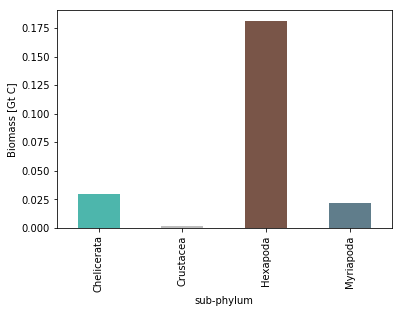

In [23]:
ar_soil_site_taxa_mean = soil_data.groupby(['aggregated taxon','order','aggregated biome','site','taxon'])['norm value'].mean().reset_index()
ar_soil_site_data = ar_soil_site_taxa_mean.groupby(['aggregated taxon','order','aggregated biome','site'])['norm value'].sum()
ar_soil_biome_means = ar_soil_site_data.reset_index().pivot_table(index=['order'],columns='aggregated biome',values='norm value', aggfunc=calc_uval)
# ar_soil_site_data.reset_index().set_index('order').loc['Araneae']
(ar_soil_biome_means.loc['Araneae']*area).sum()/1e18
ar_soil_biome_means.loc['Araneae']

aggregated biome
Boreal Forests/Taiga                                               59+/-14
Crops                                                           51.0+/-nan
Deserts and Xeric Shrublands                                           NaN
Mediterranean Forests, Woodlands and Scrub                             NaN
Pasture                                                                NaN
Temperate Forests                                                  65+/-12
Temperate Grasslands, Savannas and Shrublands                       21+/-7
Tropical and Subtropical Forests                                   36+/-14
Tropical and Subtropical Grasslands, Savannas and Shrublands       28+/-21
Tundra                                                              18+/-5
Name: Araneae, dtype: object

In [78]:
# total_soil = (part1.groupby('aggregated taxon').Total.sum()/1e18).sum()
non_na = ~(part1['Total'].apply(lambda x: x.std_dev).isna())
total_soil =  (part1.loc[non_na,'Total'].sum()+part1.loc[~non_na,'Total'].apply(lambda x: x.nominal_value).sum())/1e18
total_soil

0.22598581397971507+/-0.019172639486772444

In [385]:
part2 = part2[part2['aggregated biome']!='Tundra']
part2.loc[:,'Total'] = (part2.loc[:,'norm value']*part2.loc[:,'area']).values
part2.pivot_table(values='Total',index='aggregated taxon',columns='aggregated biome',aggfunc=sum)/1e18

aggregated biome,Forests,Shrubland/Grassland
aggregated taxon,,
Formicidae,0.0050+/-0.0012,0.031+/-0.007
Isoptera,0.1875468772814954+/-nan,0.10+/-0.04


In [386]:
part2.groupby('aggregated taxon').Total.sum()/1e18

aggregated taxon
Formicidae                0.036+/-0.007
Isoptera      0.28914764157651207+/-nan
Name: Total, dtype: object

In [117]:
total_soil = (part1.Total.sum()+part2.Total.sum())/1e18

In [44]:
canopy_site_taxa_mean = canopy_data.groupby(['aggregated biome','site','taxon'])['norm value'].mean().reset_index()
canopy_site_data = canopy_site_taxa_mean.groupby(['aggregated biome','site'])['norm value'].sum()
canopy_biome_means = canopy_site_data.reset_index().pivot_table(index='aggregated biome',values='norm value', aggfunc=[calc_uval,'count'])

canopy_biome_means = canopy_biome_means.droplevel(axis=1,level=0)
canopy_biome_means.columns = ['mean','N']


def print_u(x):
    if type(x) != uncertainties.core.Variable:
        return '{:.0f}'.format(x )
    else: 
        return '{:.0f}'.format(x.nominal_value)+'±'+'{:.0f}'.format(x.std_dev)

canopy_biome_means_print = canopy_biome_means.applymap(print_u)
#soil_biome_means_print.to_csv('results/table_1.csv')
canopy_biome_means_print

/home/yinonbaron/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


,mean,N
aggregated biome,,
Boreal Forests/Taiga,154±23,6
"Mediterranean Forests, Woodlands and Scrub",182±nan,1
Temperate Forests,230±63,4
Tropical and Subtropical Forests,458±382,4


In [47]:
total_canopy = np.nansum(canopy_biome_means['mean']*area)/1e18
total_canopy

0.012980643707+/-0.006779288674337382

In [155]:
surface_site_taxa_mean = surface_data.groupby(['aggregated biome','site','taxon'])['norm value'].mean().reset_index()
surface_site_data = surface_site_taxa_mean.groupby(['aggregated biome','site'])['norm value'].sum()
surface_biome_means = surface_site_data.reset_index().pivot_table(index='aggregated biome',values='norm value', aggfunc=[calc_uval,'count'])

surface_biome_means = surface_biome_means.droplevel(axis=1,level=0)
surface_biome_means.columns = ['mean','N']


def print_u(x):
    if type(x) != uncertainties.core.Variable:
        return '{:.0f}'.format(x )
    else: 
        return '{:.0f}'.format(x.nominal_value)+'±'+'{:.0f}'.format(x.std_dev)

surface_biome_means_print = surface_biome_means.applymap(print_u)
#soil_biome_means_print.to_csv('results/table_1.csv')
surface_biome_means_print

,mean,N
aggregated biome,,
Crops,114±21,17
Deserts and Xeric Shrublands,485±283,2
Pasture,15±15,2
"Temperate Grasslands, Savannas and Shrublands",5298±2737,4


In [49]:
total_surface = np.nansum(surface_biome_means['mean']*area)/1e18
total_surface

0.040415192019706+/-0.015869214574475873

In [558]:
surface_biome_mean = surface_data.groupby(['aggregated biome','site'])['numerical value'].sum().groupby('aggregated biome').agg(['mean','sem'])
surface_biome_mean = surface_biome_mean.merge(pd.DataFrame(biome_area1),left_index=True,right_index=True)
surface_biome_mean['unp']=unp.uarray(nominal_values=surface_biome_mean['mean'],std_devs=surface_biome_mean['sem'])
surface_biome_mean['Total'] = surface_biome_mean.unp*surface_biome_mean.area
surface_biome_mean.Total/1e18

Crops                                            0.0062+/-0.0014
Deserts and Xeric Shrublands                       0.027+/-0.023
Pasture                                          0.0004+/-0.0004
Temperate Grasslands, Savannas and Shrublands        0.10+/-0.05
Name: Total, dtype: object

In [85]:
total_surface = surface_biome_mean.Total.sum()/1e18
total_surface

NameError: name 'surface_biome_mean' is not defined

In [51]:
overall_biomass = total_surface+total_canopy+total_soil
overall_biomass

0.2793816497064211+/-0.025794976856560705

,0
Soil,0.808879
Canopy,0.046462
Aboveground,0.144659


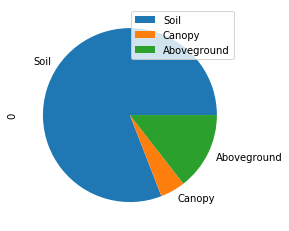

In [84]:


(pd.DataFrame([total_soil.nominal_value,total_canopy.nominal_value,total_surface.nominal_value],index=['Soil','Canopy','Aboveground'])/overall_biomass.nominal_value).plot.pie(y=0)
(pd.DataFrame([total_soil.nominal_value,total_canopy.nominal_value,total_surface.nominal_value],index=['Soil','Canopy','Aboveground'])/overall_biomass.nominal_value)

In [74]:
total_surface+total_canopy+total_soil

0.2793816497064211+/-nan

In [24]:
print(canopy_data.site.nunique())
print(surface_data.site.nunique())

14
18


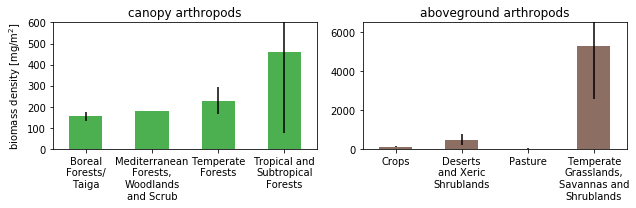

In [284]:
canopy_biome_means_bar = canopy_biome_means.copy()
ind = canopy_biome_means_bar.index.values
ind[0] = 'Boreal\nForests/\nTaiga'
ind[1] = 'Mediterranean\nForests,\nWoodlands\nand Scrub'
ind[2] = 'Temperate\nForests'
ind[3] = 'Tropical and\nSubtropical\nForests'
canopy_biome_means_bar.index = ind

surface_biome_means_bar = surface_biome_means.copy()
ind2 = surface_biome_means_bar.index.values

ind2[1] = 'Deserts\nand Xeric\nShrublands'
ind2[3] = 'Temperate\nGrasslands,\nSavannas and\nShrublands'
surface_biome_means_bar.index = ind2

fig = plt.subplots(figsize=[9,3])
ax = plt.subplot(1,2,1)
canopy_biome_means_bar['mean'].apply(lambda x: x.nominal_value).plot.bar(yerr=canopy_biome_means['mean'].apply(lambda x: x.std_dev),colors=['#4caf50'],rot=0,ax=ax)
ax.set_ylabel('biomass density [mg/m$^2$]')
ax.set_title('canopy arthropods')
ax.set_ylim([0,600])

ax2 = plt.subplot(1,2,2)
surface_biome_means_bar['mean'].apply(lambda x: x.nominal_value).plot.bar(yerr=surface_biome_means['mean'].apply(lambda x: x.std_dev),colors=['#8d6e63'],rot=0,ax=ax2)
ax.set_ylabel('biomass density [mg/m$^2$]')
ax2.set_title('aboveground arthropods')
ax2.set_ylim([0,6500])
plt.tight_layout()
plt.savefig('results/fig3.svg',dpi=300)
plt.savefig('results/fig3.png',dpi=300)

In [218]:
site_units = mass_data.groupby('site').units.nunique()
cal_data=mass_data[mass_data.site.isin(site_units[site_units==2].index)]
cal_pvt = cal_data.pivot_table(index=['site','taxon'],columns='units',values='numerical value',aggfunc=np.nanmean)
conv_ratios = (cal_pvt['mg/m^2 (dry weight)']/cal_pvt['mg/m^2 (wet weight)']).reset_index()
print(conv_ratios[conv_ratios.site.str.startswith('Cow')].mean())
print(conv_ratios[conv_ratios.site.str.startswith('Cow')].sem())

0    0.316134
dtype: float64
0    0.074895
dtype: float64
